In [2]:
!pip install kagglehub

In [10]:
!pip install opencv-python


   ---------------------------------------- 0.0/39.0 MB ? eta -:--:--
   -- ------------------------------------- 2.4/39.0 MB 14.9 MB/s eta 0:00:03
   ----- ---------------------------------- 5.5/39.0 MB 15.2 MB/s eta 0:00:03
   --------- ------------------------------ 9.4/39.0 MB 16.3 MB/s eta 0:00:02
   ------------- -------------------------- 12.8/39.0 MB 16.8 MB/s eta 0:00:02
   ----------------- ---------------------- 16.8/39.0 MB 17.0 MB/s eta 0:00:02
   -------------------- ------------------- 20.4/39.0 MB 17.2 MB/s eta 0:00:02
   ------------------------ --------------- 24.1/39.0 MB 17.1 MB/s eta 0:00:01
   ---------------------------- ----------- 27.8/39.0 MB 17.3 MB/s eta 0:00:01
   -------------------------------- ------- 31.7/39.0 MB 17.4 MB/s eta 0:00:01
   ---------------------------------- ----- 33.8/39.0 MB 16.8 MB/s eta 0:00:01
   ------------------------------------- -- 37.0/39.0 MB 16.7 MB/s eta 0:00:01
   ---------------------------------------  38.8/39.0 MB 16.7 MB

In [1]:
!pip install mediapipe

  Using cached mediapipe-0.10.21-cp311-cp311-win_amd64.whl.metadata (10 kB)
  Using cached jax-0.8.1-py3-none-any.whl.metadata (13 kB)
  Using cached jaxlib-0.8.1-cp311-cp311-win_amd64.whl.metadata (1.4 kB)
  Using cached opencv_contrib_python-4.12.0.88-cp37-abi3-win_amd64.whl.metadata (20 kB)
INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
  Using cached jax-0.8.0-py3-none-any.whl.metadata (13 kB)
  Using cached jaxlib-0.8.0-cp311-cp311-win_amd64.whl.metadata (1.4 kB)
  Using cached jax-0.7.2-py3-none-any.whl.metadata (13 kB)
  Using cached jaxlib-0.7.2-cp311-cp311-win_amd64.whl.metadata (1.4 kB)
  Using cached jax-0.7.1-py3-none-any.whl.metadata (13 kB)
  Using cached jaxlib-0.7.1-cp311-cp311-win_amd64.whl.metadata (1.3 kB)
INFO: pip is looking at multiple versions of opencv-contrib-python to determine which version is compatible with other requirements. This could take a while.
  Using cached

In [40]:
import kagglehub
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2
import os
path = kagglehub.dataset_download("danrasband/asl-alphabet-test")

print("Path to dataset files:", path)

root = os.path.join(path, "asl_dataset")
print("Using dataset root:", root)

print("Root path:", path)
print("\nFolders inside dataset:")
print(os.listdir(path))

100%|█████████████████████████████████████████████████████████████████████████████| 24.3M/24.3M [00:04<00:00, 5.48MB/s]

Extracting files...


Path to dataset files: C:\Users\mckon\.cache\kagglehub\datasets\danrasband\asl-alphabet-test\versions\1
Using dataset root: C:\Users\mckon\.cache\kagglehub\datasets\danrasband\asl-alphabet-test\versions\1\asl_dataset
Root path: C:\Users\mckon\.cache\kagglehub\datasets\danrasband\asl-alphabet-test\versions\1

Folders inside dataset:
['A', 'asl-alphabet-test', 'B', 'C', 'D', 'del', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'nothing', 'O', 'P', 'Q', 'R', 'S', 'space', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


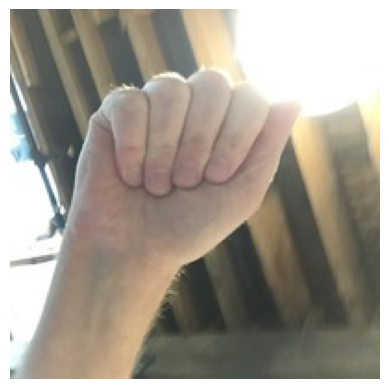

In [51]:
root = path
class_folder = os.path.join(root, "A")

# Pick the first image
img_path = os.path.join(class_folder, os.listdir(class_folder)[0])

img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.axis("off")
plt.show()


In [71]:
IMG_SIZE = 64  

X = []
y = []

for label in os.listdir(root):
    class_folder = os.path.join(root, label)
    if not os.path.isdir(class_folder):
        continue

    for img_name in os.listdir(class_folder):
        img_path = os.path.join(class_folder, img_name)
        
        img = cv2.imread(img_path)
        if img is None:
            continue
        
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

        X.append(img.flatten())
        y.append(label)
X = np.array(X)
y = np.array(y)

print("Feature matrix shape:", X.shape)
print("Labels shape:", y.shape)

Feature matrix shape: (870, 4096)
Labels shape: (870,)
